In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x=np.linspace(-5,5,50)
plt.plot(x,sigmoid(x),'b')
plt.grid()


In [ ]:
# softmax

In [ ]:
softmax = lambda W: np.exp(np.array(W)) / np.sum(np.exp(np.array(W)))

In [ ]:
x=np.linspace(-5,5,50)
W=softmax(x)
plt.plot(x,W,'b')
plt.grid()

In [ ]:
# ReLU

In [ ]:
ReLU = lambda w: np.maximum(w,0)

In [ ]:
x=np.linspace(-5,5,50)
plt.plot(x,ReLU(x),'b')
plt.grid()

# TensorFlow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
%matplotlib inline


In [ ]:
dados_df = pd.read_csv('pesos-alturas.csv',decimal=',')

In [ ]:
dados_df.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dados_df[['Alturas']],dados_df[['Pesos']], 
                                                    test_size=0.33)

In [ ]:
# Definindo os coeficientes (aquilo que queremos calcular):
# y = ax + b

In [ ]:
a = tf.Variable(np.random.randn(), name="ca")
b = tf.Variable(np.random.randn(), name="cl")

In [ ]:
# Definindo as variáveis (dependente e independente):

In [ ]:
x = tf.placeholder("float")
y = tf.placeholder("float")

In [ ]:
# Definindo o modelo:

In [ ]:
y_hat = tf.add(tf.multiply(x, a), b)

In [ ]:
# Definindo a função de perda:

In [ ]:
perda = tf.reduce_sum(tf.pow(y_hat - y, 2)/2)

In [ ]:
# Otimização:

In [ ]:
l_rate = 0.001

In [ ]:
otim = tf.train.GradientDescentOptimizer(l_rate).minimize(perda)
init = tf.global_variables_initializer()

In [ ]:
# Vamos rodar. Vou repetir o treino para evitar o problema do "mínimo local":

In [ ]:
epochs = 10000 
with tf.Session() as sess:
    sess.run(init)
    print('a',sess.run(a),'b',sess.run(b))    
    for epoch in range(epochs):
        sess.run(otim, feed_dict={x: X_train, y: y_train})
    plt.scatter(X_train, y_train)
    print('a',sess.run(a),'b',sess.run(b))
    plt.plot(X_train, sess.run(a) * X_train + sess.run(b),c="r")

## TensorFLow com Estimator API

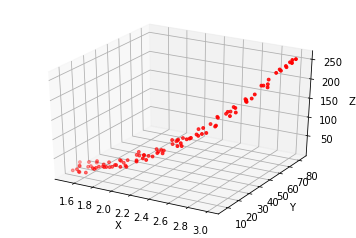

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import itertools as ite
import tensorflow as tf
%matplotlib inline

np.random.seed(42)
X = np.linspace(1.5,3.0,num=100)
Y = np.array([x**4 + (np.random.rand()*8.5) for x in X])
Z = np.array([(X[i]*Y[i]) + (np.random.rand()*10.2) for i in range(0,100)])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r',s=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [2]:
features = pd.DataFrame({'X':X, 'Z':Z})

In [3]:
labels = pd.DataFrame({'Y':Y})

In [4]:
features.head()

,X,Z
0,1.500000,12.689714
1,1.515152,26.720533
2,1.530303,21.120317
3,1.545455,21.867811
4,1.560606,20.583708


In [5]:
labels.head()

,Y
0,8.246091
1,13.351237
2,11.706104
3,10.793194
4,7.257776


In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)


In [7]:
feature_cols = [tf.contrib.layers.real_valued_column('X'),tf.contrib.layers.real_valued_column('Z')]

In [34]:
regressor = tf.contrib.learn.DNNRegressor(
    feature_columns=feature_cols, hidden_units=[4],label_dimension=1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5758204a90>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpdnhwpzws'}


In [35]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=4,num_epochs=None,shuffle=True)

In [36]:
regressor.fit(input_fn=input_func,steps=1000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpdnhwpzws/model.ckpt.
INFO:tensorflow:loss = 805.233, step = 1
INFO:tensorflow:global_step/sec: 848.563
INFO:tensorflow:loss = 9.56576, step = 101 (0.123 sec)
INFO:tensorflow:global_step/sec: 729.519
INFO:tensorflow:loss = 17.3064, step = 201 (0.137 sec)
INFO:tensorflow:global_step/sec: 751.187
INFO:tensorflow:loss = 6.14991, step = 301 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.721
INFO:tensorflow:loss = 10.8216, step = 401 (0.131 sec)
INFO:tensorflow:global_step/sec: 692.07
INFO:tensorflow:loss = 8.28965, step = 501 (0.142 sec)
INFO:tensorflow:global_step/sec:

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f57580f9780>, 'hidden_units': [4], 'feature_columns': (_RealValuedColumn(column_name='X', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Z', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)), 'optimizer': None, 'activation_fn': <function relu at 0x7f575f0982f0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [37]:
eval_func = tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=4,num_epochs=None,shuffle=True)

In [38]:
resultado = regressor.evaluate(input_fn=eval_func,steps=1)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-11-24-16:15:27
INFO:tensorflow:Restoring parameters from /tmp/tmpdnhwpzws/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-11-24-16:15:27
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 2.16675


In [39]:
print('Perda',resultado['loss'])

Perda 2.16675


In [40]:
y_hat = regressor.predict(input_fn=eval_func)

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
INFO:tensorflow:Restoring parameters from /tmp/tmpdnhwpzws/model.ckpt-1000


In [47]:
preds = np.array(list(ite.islice(y_hat,int(X_test['X'].size))))


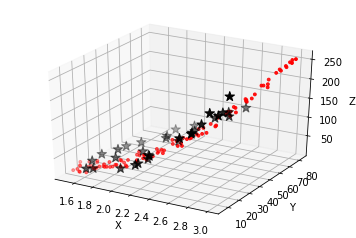

In [49]:
fig = plt.figure()
ax = ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r',s=8)
ax.scatter(X_test['X'], preds, X_test['Z'], c='k', marker='*',s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')